In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import scipy
from sklearn import svm

In [36]:
# import the dataset
dataset = pd.read_csv('ANN_circle.csv')
X = dataset[['x1', 'x2']].values
Y = dataset['label'].values.reshape(100,1)

# Sigmoid function and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)


In [41]:
# Define the neural network
class NeuralNetwork:
    def __init__(self, input_layer_size, hidden_layer_size, output_layer_size):
        self.input_layer_weights = np.random.randn(input_layer_size, hidden_layer_size)
        # print(self.input_layer_weights)
        self.output_layer_weights = np.random.randn(hidden_layer_size, output_layer_size)
        # print(self.output_layer_weights)
        self.hidden_layer_bias = np.random.randn(1, hidden_layer_size)
        # print(self.hidden_layer_bias)
        self.output_layer_bias = np.random.randn(1, output_layer_size)
        # print(self.output_layer_bias)

    def forward(self, X):
        self.hidden_layer_weight = sigmoid(np.dot(X, self.input_layer_weights) + self.hidden_layer_bias)
        # print(self.hidden_layer_weight)
        self.final_output = sigmoid(np.dot(self.hidden_layer_weight, self.output_layer_weights) + self.output_layer_bias)
        # print(self.final_output)
        return self.final_output


    def backpropagate(self, X, Y, learning_rate):
        # mean squared error derivative
        self.loss = Y - self.final_output

        # print(f'Loss: {self.loss}')

        # Calculate the gradient of the output layer
        self.output_layer_gradient = sigmoid_derivative(self.final_output) * self.loss

        # Calculate the gradient of the hidden layer
        self.hidden_layer_gradient = sigmoid_derivative(self.hidden_layer_weight) * np.dot(self.output_layer_gradient, self.output_layer_weights.T)

        # Update the weights and biases
        self.output_layer_weights += np.dot(self.hidden_layer_weight.T, self.output_layer_gradient) * learning_rate
        self.output_layer_bias += np.sum(self.output_layer_gradient, axis=0, keepdims=True) * learning_rate
        self.input_layer_weights += np.dot(X.T, self.hidden_layer_gradient) * learning_rate
        self.hidden_layer_bias += np.sum(self.hidden_layer_gradient, axis=0, keepdims=True) * learning_rate


    def train(self, X, Y, epochs, learning_rate):
        for epoch in range(epochs):
            self.forward(X)
            self.backpropagate(X, Y, learning_rate)
            # Print the loss every 1000 epochs
            if epoch % 10000 == 0:
                # mean squared error loss
                loss = 0.5 * np.mean(( Y - self.final_output ) ** 2)
                print(f'Epoch {epoch}: loss {loss}')

    def predict(self, X):
        return self.forward(X)


In [42]:
nn = NeuralNetwork(input_layer_size=2, hidden_layer_size=25, output_layer_size=1)
# nn.forward(X)
# nn.backpropagate(X, Y, 0.01)
# nn.forward(X)
nn.train(X, Y, epochs=100000, learning_rate=0.1)
X_test = np.array([[0.5, 0.5]])
print(nn.predict(X_test))

Epoch 0: loss 0.2501708342394401
Epoch 10000: loss 0.0001463744778669988
Epoch 20000: loss 5.610981135973808e-05
Epoch 30000: loss 3.300675881888312e-05
Epoch 40000: loss 2.2920620319580744e-05
Epoch 50000: loss 1.7374853895524442e-05
Epoch 60000: loss 1.3902339458712802e-05
Epoch 70000: loss 1.1538393677927661e-05
Epoch 80000: loss 9.832436636017375e-06
Epoch 90000: loss 8.547189061880173e-06
[[0.99990386]]


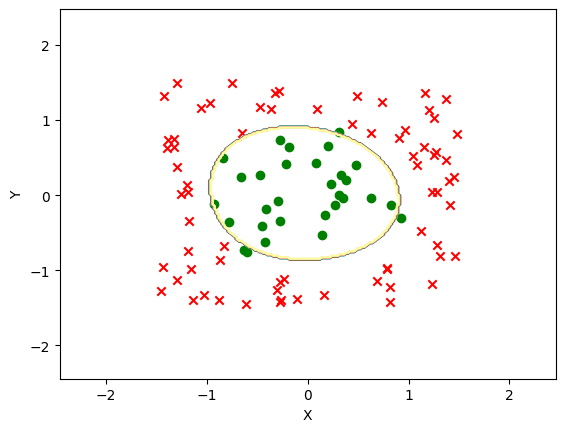

In [56]:

res = nn.predict(X).flatten()
# print(res)
inside = np.array([X[i] for i in range(len(res)) if res[i] >= 0.5])
outside = np.array([X[i] for i in range(len(res)) if res[i] < 0.5])

fig = plt.figure()


plt.scatter(inside[:,0],inside[:,1], c='green', marker='o')
plt.scatter(outside[:,0],outside[:,1], c= 'red', marker='x')

X_axis = np.concatenate((inside,outside), axis = 0)
Y_axis = np.concatenate((np.ones(len(inside)), np.zeros(len(outside))), axis = 0)

C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'rbf',  gamma=0.7, C=C )
clf.fit(X_axis, Y_axis)

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_axis[:, 0].min() - 1, X_axis[:, 0].max() + 1
y_min, y_max = X_axis[:, 1].min() - 1, X_axis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# add axis labels
plt.xlabel('X')
plt.ylabel('Y')

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)